# Demo Setup

In [5]:
import os
import matplotlib.pyplot as plt
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
from funman.server.query import FunmanResults
import pandas as pd

RESULTS_DIR = os.path.join(
    os.path.dirname(os.path.abspath("")), "scratch/out/hackathon"
)

out_dir = os.path.join(os.path.dirname(os.path.abspath("")), "out")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

def get_job_results(job):
    results_file = os.path.join(RESULTS_DIR, f"{job}.json")
    results: FunmanResults = FunmanResults.parse_file(results_file)
    return results

def plot(job_num=9):
    job=jobs[job_num]
    results = get_job_results(job)
    ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=["t_0", "num_steps"]
    ).plot(show=False)
    plt.savefig(f"{out_dir}/{results.id}.png")
    plt.show()
    plt.close()

jobs = [
   "07fbb930-454c-45fe-9bae-a3cc94b39bf1", # 0 1.1.b, t_0 = 0, step_size = 4, num_steps = 100
   "440eb793-c1f2-4625-a86a-0c4924c37e37", # 1 1.1.b, t_0 = 0, step_size = 3, num_steps = 100
   "9e225362-e7c7-4aae-9f71-0624a9f7d727", # 2 1.1.b, t_0 = 0, step_size = 2, num_steps = 200
   "af4c04a5-5843-4eb7-9b44-ec43459ec289", # 3 1.1.b, t_0 = 50, step_size = 4, num_steps = 100
   "f31b6ba1-3baf-4100-bf09-80f578d56ad7", # 4 1.1.b, t_0 = 50, step_size = 3, num_steps = 100
   "b5889ec1-ed06-4082-8a6a-400a66a53ef5", # 5 1.1.b, t_0 = 50, step_size = 1, num_steps = 300
   "4a1fb718-5d8c-44e4-962d-f162895f260d", # 6 1.1.b, t_0 = 100, step_size = 4, num_steps = 100
   "98a25914-e955-4693-b41e-f335d789f2c4", # 7 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
   "98a25914-e955-4693-b41e-f335d789f2c4", # 8 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
   "b57e7127-470a-4ffa-9b1d-5f1d658a22a0", # 9 ps all 
   "0c201c6a-52fd-473e-829f-59a7c430431d", # 10 1.1.b, t_0 - 50, step_size = 1, num_steps = 400
   "5ac1a088-d088-49f3-a46e-8a6d3d31dfbf", # 11 1.1.b, t_0 = 0, step_size = 1, num_steps = 400
   "a0e4c698-fd47-4c31-89b6-6e17b48e1ebe", # 12 ps 10 step with point models
        ]

def plot_point(job_num=-1, points_to_plot=list(range(1))):
    job=jobs[job_num]
    results = get_job_results(job)
    if points_to_plot=="*":
        points = results.parameter_space.true_points
    else:
        points = [p for i, p in enumerate(results.parameter_space.true_points) if i in points_to_plot]

    df = results.dataframe(points)
    max_infected_percent = df["I"].max()/5600000.0
    max_day = df["I"].idxmax()
    print(f"Max Infected %: {max_infected_percent}, Max Day: {max_day}")

    # title=f"t_0 = {point.values['t_0']} ({point.values['num_steps']}x{point.values['step_size']})"
    title=""
    results.plot(points, log_y=False, max_time=400, title=title, alpha=0.5, ms=0.1)

# %load_ext autoreload
# %autoreload 2

Max Infected %: 1.8854710929520324e-06, Max Day: 55.0


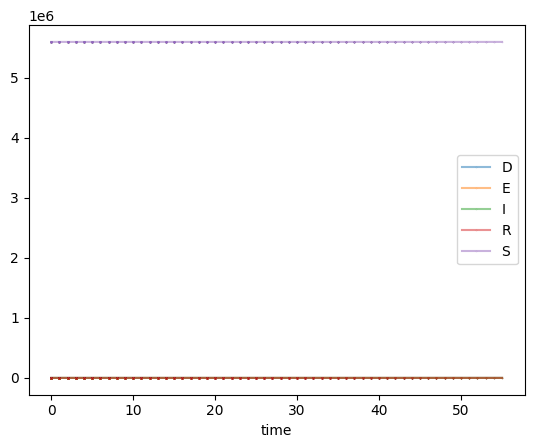

In [8]:
plot_point(job_num=12, points_to_plot="*")
results = get_job_results(jobs[12])
points = results.parameter_space.true_points
# results.dataframe(points[-1:])

# all_df = pd.DataFrame()
# for point in points:
#     df = results.dataframe(point)
#     all_df = pd.concat([all_df, df])
# all_df
# results.dataframe(points)

Max Infected %: 0.10643049589242828, Max Day: 300.0


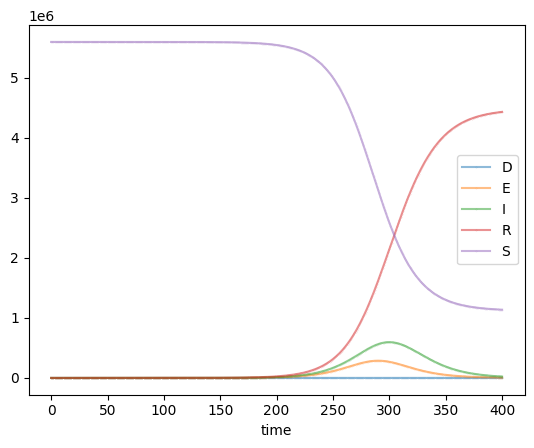

In [2]:
# t_0 = 0
# From paper:
# Max % Infected: 10.45%  (abs-diff = 0.19)
# Max Day: 291            (abs-diff = 9)
plot_point(job_num=11)

Max Infected %: 0.10649399745866316, Max Day: 208.0


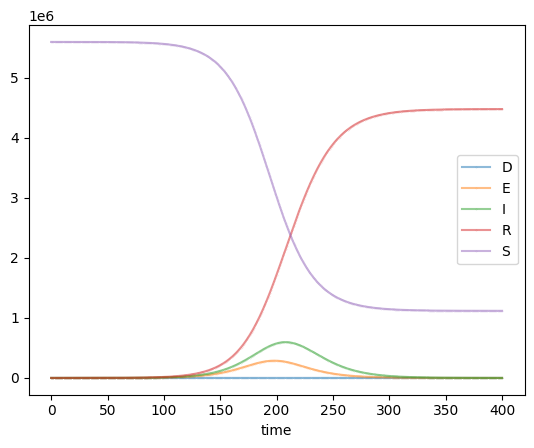

In [3]:
# t_0 = 50
# From paper:
# Max % Infected: 10.47%  (abs-diff = 0.17)
# Max Day: 195            (abs-diff = 13)
plot_point(job_num=10)

Max Infected %: 0.20321439764730662, Max Day: 112.0


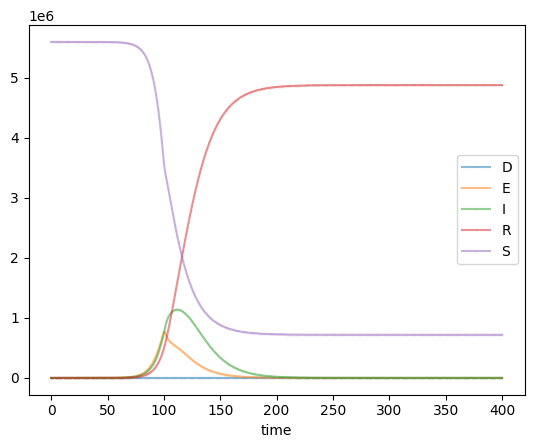

In [4]:
# t_0 = 100
# From paper:
# Max % Infected: 27.47%  (abs-diff = 7.15)
# Max Day: 103            (abs-diff = 9)
plot_point(job_num=8)

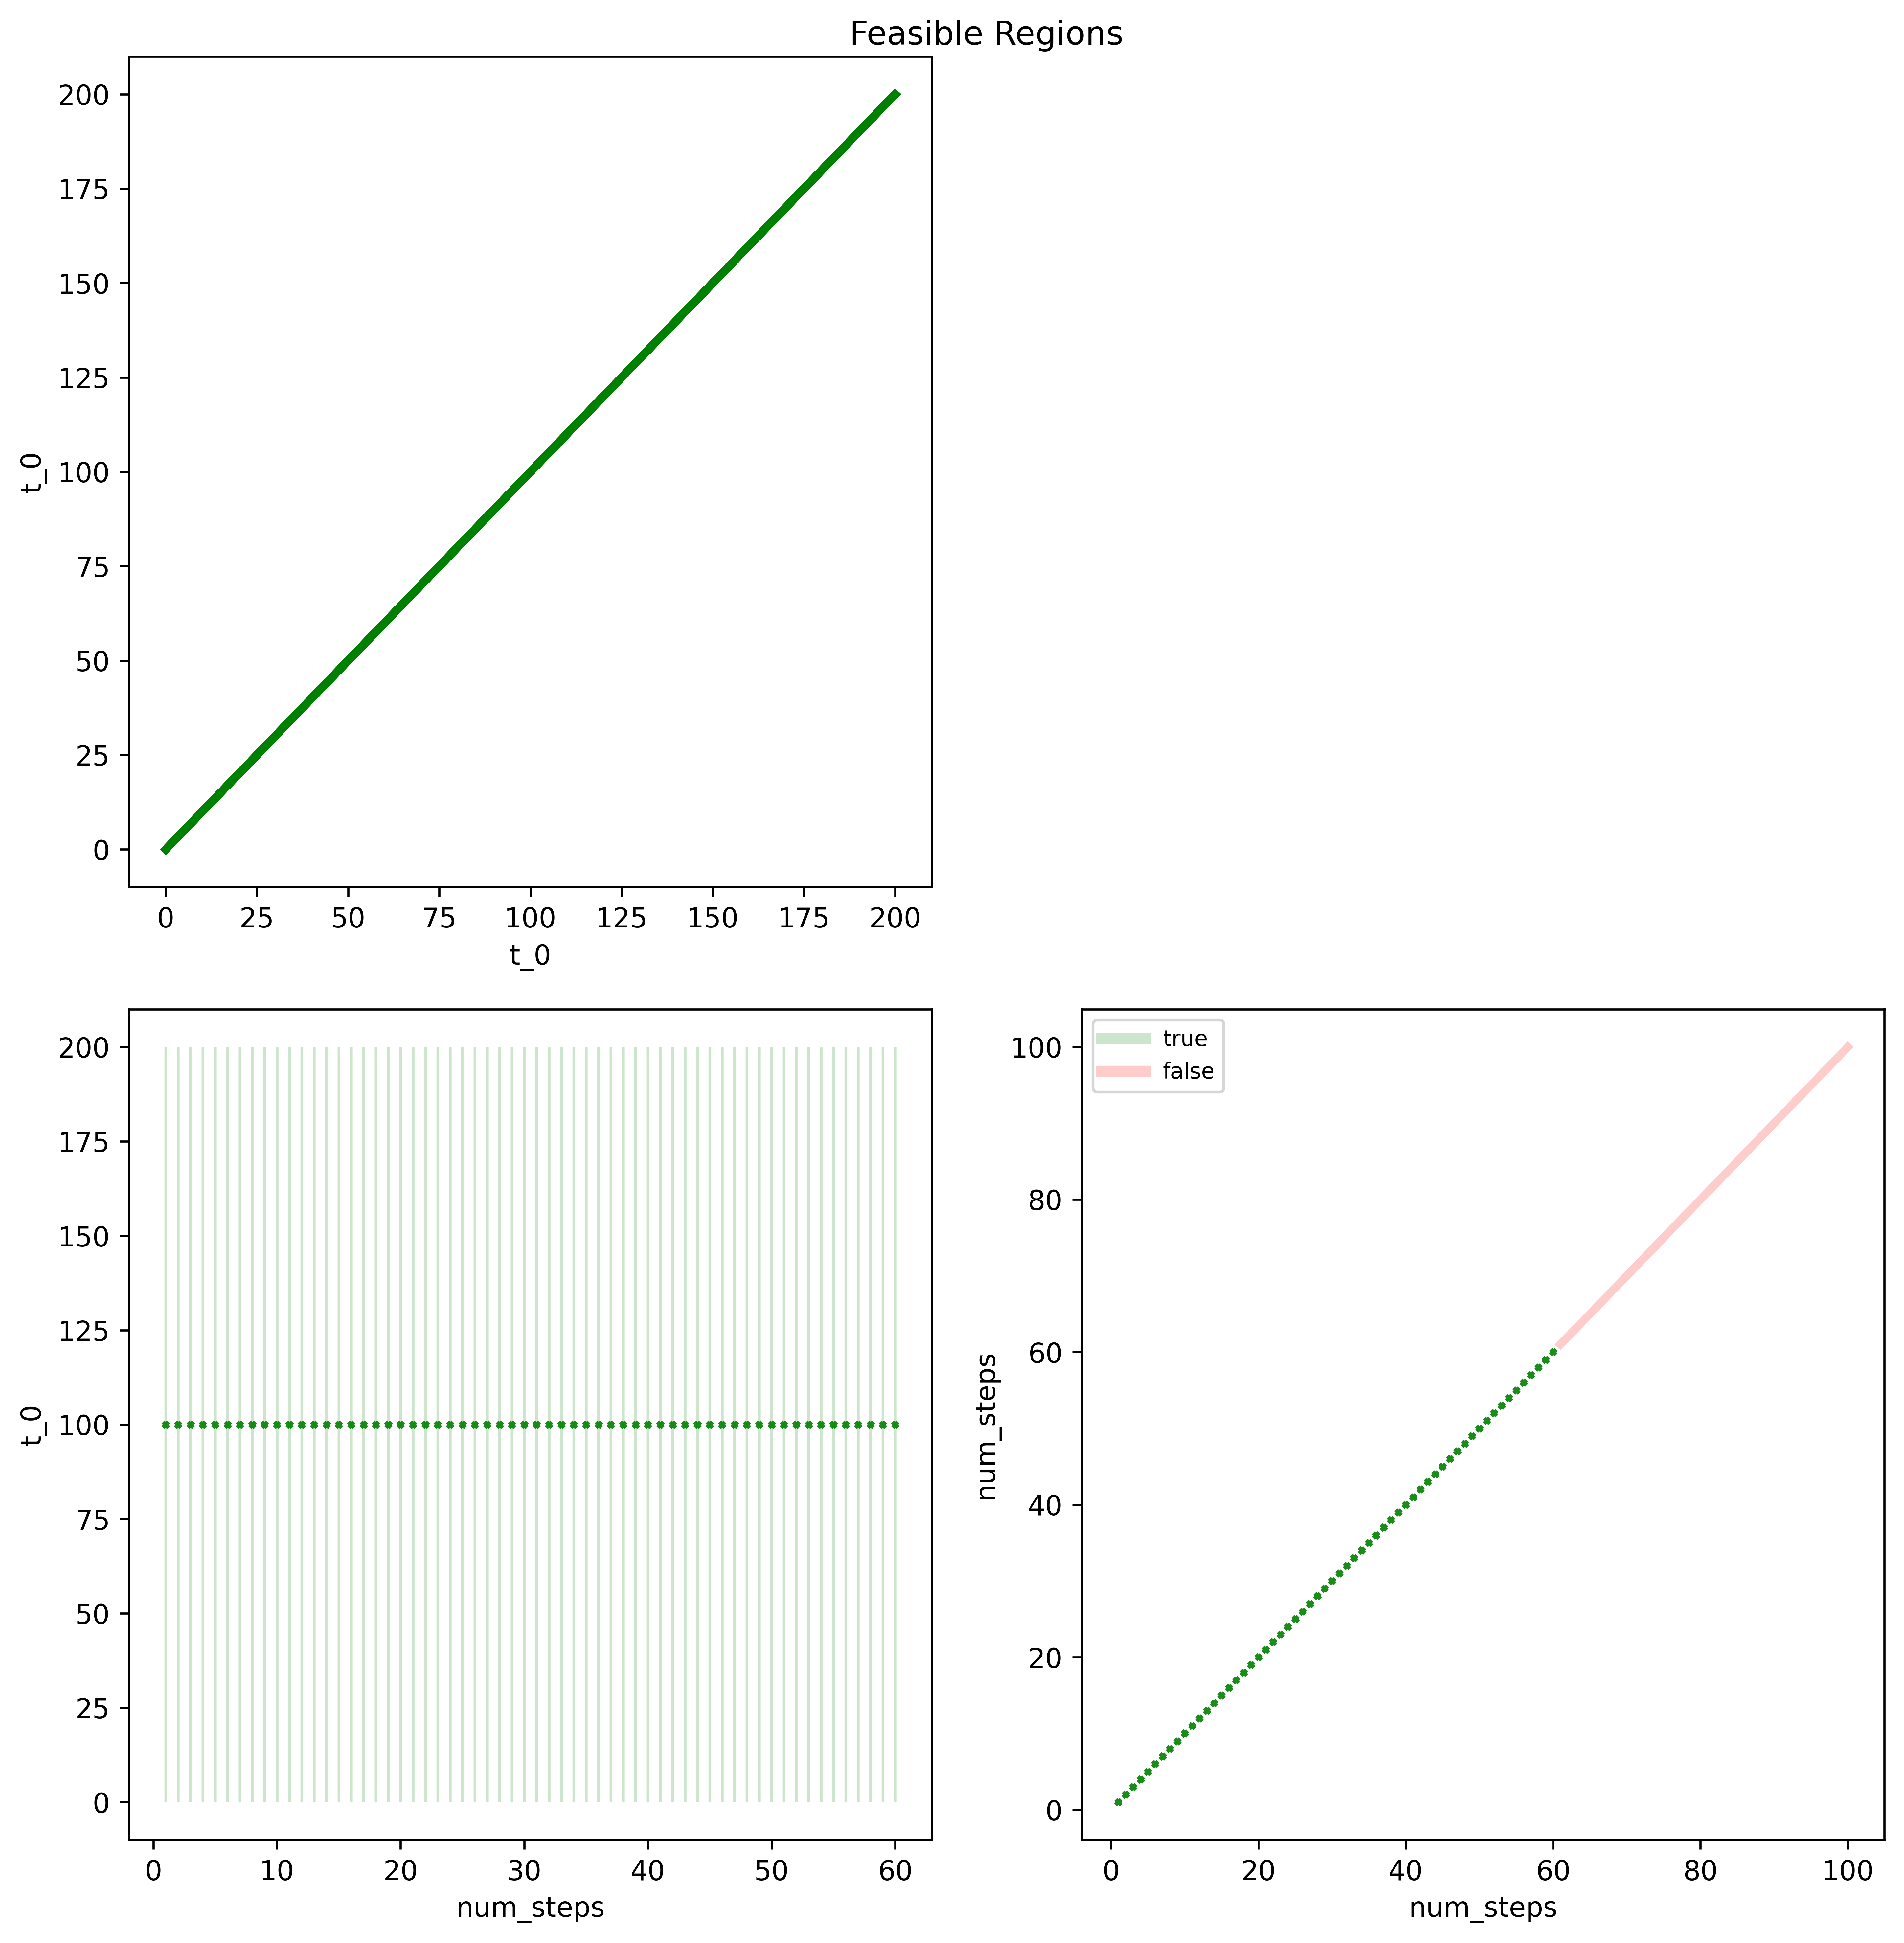

In [2]:
plot(job_num=9)

In [ ]:
# d=
results.dataframe(point)
# d.loc["I","max"]

NameError: name 'results' is not defined

In [ ]:
plot(results)